## PREDICTING HOUSE RENT PRICE
based on location, bedroom, bathroom, and floor area

In [816]:
## IMPORT BASIC

import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import warnings
warnings.filterwarnings('ignore') #IGNORE WARNINGS

### DATA EXPLORATION

In [817]:
df = pd.read_csv('house_rental.csv');

In [818]:
df

,Unnamed: 0,title,Municipality,Province,price,agent,agent_membership,agent_verified,date,vendor,bedroom,bath,floor_area
0,0,"Dormitory Spaces for Rent in Santo Tomas, Bata...",Santa Anastacia,Santo Tomas,12500,Oasis FPIP,2019,verified,03 19 2023,lamudi,1,1,15
1,1,Rush For Lease: 35-Door Staff House Near Circu...,Olympia,Makati,54500,Fern Marie Badong,2017,verified,03 19 2023,lamudi,35,35,1100
2,2,Room for Rent in Greenpark Mangahan Pasig near...,Green Park,Pasig,8500,Ed Mallari,2014,verified,03 19 2023,lamudi,1,1,20
3,3,Discounted Price! For Rent Studio Type Apartme...,Maypajo,Caloocan,12000,JESSA MARTIN,2022,not verified,03 19 2023,lamudi,1,1,26
4,4,"Apartment Building For Rent Located in Molino,...",Molino VII,Bacoor,12500,Clement Dizon,2016,verified,03 19 2023,lamudi,40,40,1700
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,15190,"Apartment for rent near CDU, ayala and SM",Subangdaku,Mandaue,10500,Danilla Velasquez,2012,verified,03 24 2023,my property,1,1,0
13851,15193,Apartment Room For Rent at San Francisco Subd....,Almanza Uno,Las Piñas,4500,Obet Guzman,2019,verified,03 24 2023,my property,1,0,18
13852,15194,Fully Furnished Apartment for rent with 3 bedr...,Cuayan,Angeles,45000,Marvin Manalo,2022,verified,03 24 2023,my property,3,3,120
13853,15195,"Apartment for RENT Upper Cubi, Subic Bay Freep...",Asinan,Olongapo,54500,Broker Janice Stuka,2023,verified,03 24 2023,my property,3,3,217


In [819]:
#Replacing the 'contact agent for price' into null values
def change_price(col):
    price_change = 'Contact agent for price';
    
    df[col][df[col] == price_change] = None;

In [820]:
change_price('price')

In [821]:
df['price']

0        12500
1        54500
2         8500
3        12000
4        12500
         ...  
13850    10500
13851     4500
13852    45000
13853    54500
13854    12500
Name: price, Length: 13855, dtype: int64

In [822]:
df.drop(['Unnamed: 0','agent', 'title'], axis = 1, inplace=True)

In [823]:
df.duplicated().sum()

978

In [824]:
df = df.drop_duplicates()

In [825]:
df.shape

(12877, 10)

In [826]:
df.isna().sum()

Municipality           0
Province            1988
price                  0
agent_membership       0
agent_verified         0
date                   0
vendor                 0
bedroom                0
bath                   0
floor_area             0
dtype: int64

In [827]:
#Change Datatypes into string values
df = df.astype('string')

In [828]:
df.dtypes

Municipality        string
Province            string
price               string
agent_membership    string
agent_verified      string
date                string
vendor              string
bedroom             string
bath                string
floor_area          string
dtype: object

In [829]:
#parsing data to appropriate values
df['price'] = df['price'].astype(float)
df['bedroom'] = df['bedroom'].astype(int)
df['floor_area'] = df['floor_area'].astype(float)
df['bath'] = df['bath'].astype(int)

In [830]:
#parse date to datetime datatype
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

In [831]:
df.dtypes

Municipality                string
Province                    string
price                      float64
agent_membership            string
agent_verified              string
date                datetime64[ns]
vendor                      string
bedroom                      int32
bath                         int32
floor_area                 float64
dtype: object

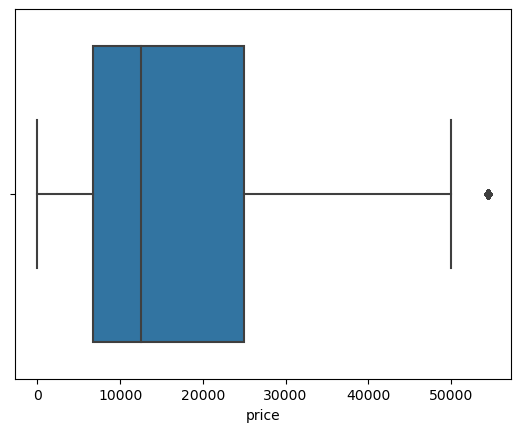

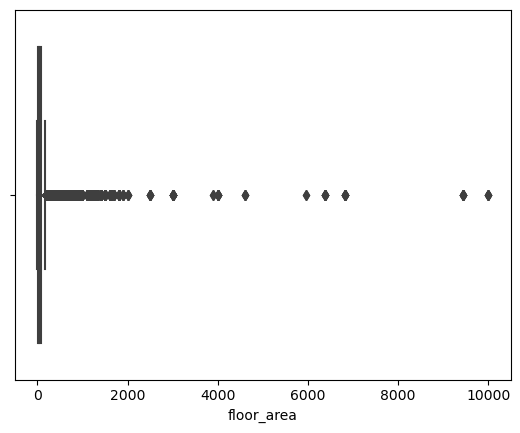

In [832]:
# sns.boxplot(df['price'])
for col in df.columns:
    if (df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [833]:
def remove_outliers(col):
    q1 = df[col].quantile(0.25);
    q3 = df[col].quantile(0.75);
    iqr = q3 - q1;
    
    max_ = q3 + (1.5*iqr);
    min_ = q1 - (1.5*iqr);
    
    df[col][df[col] < min_] = min_;
    df[col][df[col] > max_] = max_;

In [834]:
remove_outliers('price')

In [835]:
# for col in df.columns:
#     if (col != 'price' and df[col].dtypes == 'float64'):
#         plt.figure()
#         sns.boxplot(df[col])

In [836]:
for col in df.columns:
    if (df[col].dtypes == 'float64'):
        remove_outliers(col)

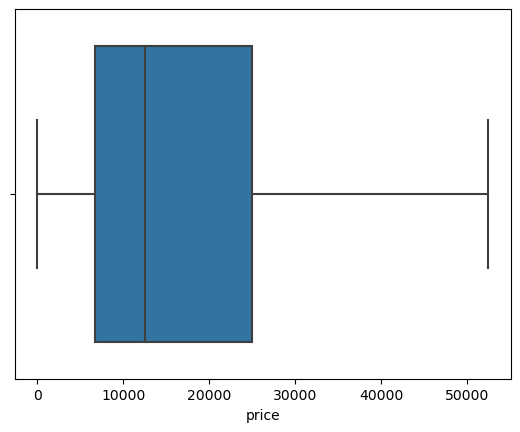

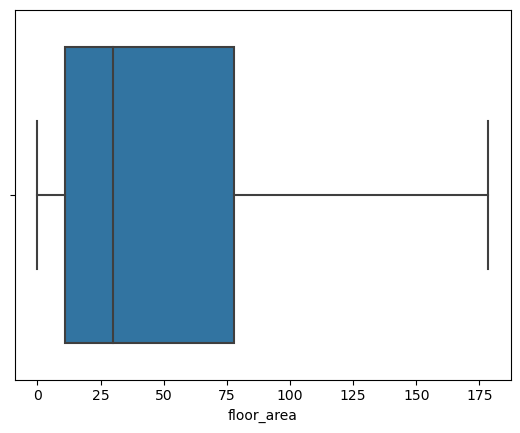

In [837]:
for col in df.columns:
    if (df[col].dtypes == 'float64'):
        plt.figure()
        sns.boxplot(df[col])

In [838]:
df['price'].fillna(df['price'].median(),inplace = True);

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

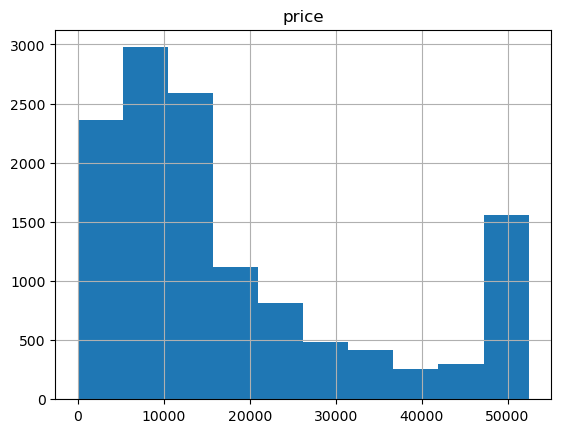

In [874]:
df.hist(column='price')

array([[<AxesSubplot:title={'center':'bedroom'}>]], dtype=object)

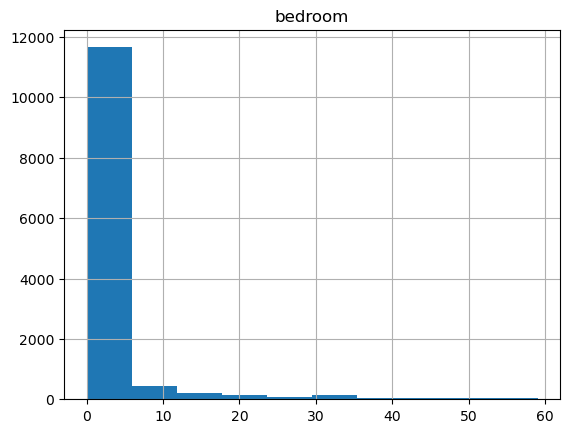

In [875]:
df.hist(column='bedroom')

array([[<AxesSubplot:title={'center':'bath'}>]], dtype=object)

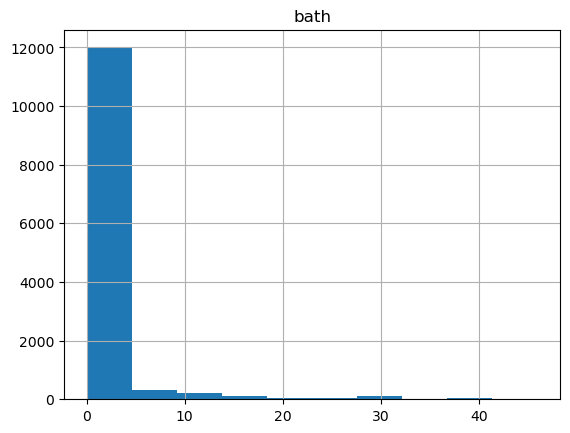

In [876]:
df.hist(column='bath')

array([[<AxesSubplot:title={'center':'floor_area'}>]], dtype=object)

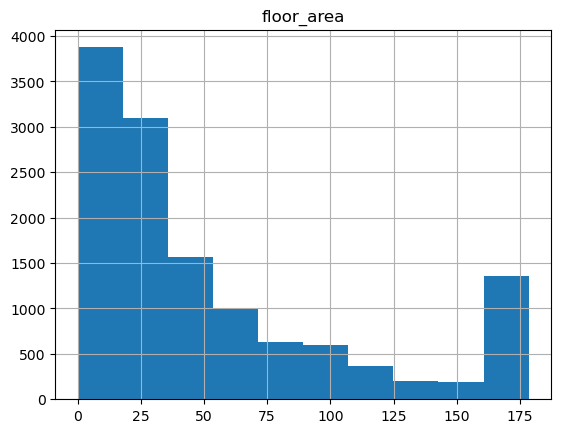

In [878]:
df.hist(column='floor_area')

### DATA CLEANING

In [841]:
# dropping non-needed columns
df.drop(['Municipality','agent_membership','agent_verified','date','vendor'],axis = 1, inplace = True)

In [842]:
# #parsing data to appropriate values
df['bedroom'] = df['bedroom'].astype(int)
df['floor_area'] = df['floor_area'].astype(float)
df['bath'] = df['bath'].astype(int)

In [843]:
df.dtypes

Province       string
price         float64
bedroom         int32
bath            int32
floor_area    float64
dtype: object

In [844]:
df.isna().sum()

Province      1988
price            0
bedroom          0
bath             0
floor_area       0
dtype: int64

In [845]:
# filling null values
df['Province'] = df['Province'].fillna('NA');
df['bedroom'] = df['bedroom'].fillna(0);
df['bath'] = df['bath'].fillna(0);
df['floor_area'] = df['floor_area'].fillna(0);

In [846]:
df.isna().sum()

Province      0
price         0
bedroom       0
bath          0
floor_area    0
dtype: int64

In [847]:

df_copy = df.copy() # preserve data for later

In [848]:
from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()

for col in df.columns:
    if(df[col].dtypes != 'float64'):
        df[col] = encoder.fit_transform(df[col])

In [849]:
df_copy

,Province,price,bedroom,bath,floor_area
0,Santo Tomas,12500.0,1,1,15.0
1,Makati,52450.0,35,35,178.5
2,Pasig,8500.0,1,1,20.0
3,Caloocan,12000.0,1,1,26.0
4,Bacoor,12500.0,40,40,178.5
...,...,...,...,...,...
13849,Cebu,25000.0,3,2,100.0
13850,Mandaue,10500.0,1,1,0.0
13851,Las Piñas,4500.0,1,0,18.0
13852,Angeles,45000.0,3,3,120.0


In [850]:
df.dtypes

Province        int32
price         float64
bedroom         int64
bath            int64
floor_area    float64
dtype: object

<AxesSubplot:>

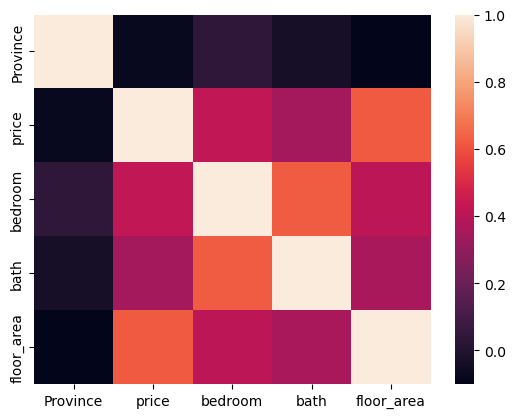

In [851]:
#looking for correlation
sns.heatmap(df.corr())

In [852]:
corr = df.corr();
corr_mask = corr.mask(np.triu(np.ones_like(corr, dtype=bool)))
corr_unstacked = corr_mask.unstack().sort_values(ascending = False);
corr_df = pd.DataFrame(corr_unstacked[abs(corr_unstacked)>.75]).sort_index()

In [853]:
corr_df

,,0


In [854]:
df.columns

Index(['Province', 'price', 'bedroom', 'bath', 'floor_area'], dtype='object')

In [855]:
df ## final dataset

,Province,price,bedroom,bath,floor_area
0,106,12500.0,1,1,15.0
1,60,52450.0,31,27,178.5
2,85,8500.0,1,1,20.0
3,20,12000.0,1,1,26.0
4,6,12500.0,34,30,178.5
...,...,...,...,...,...
13849,24,25000.0,3,2,100.0
13850,67,10500.0,1,1,0.0
13851,51,4500.0,1,0,18.0
13852,0,45000.0,3,3,120.0


### Modeling

In [856]:
#separating data from the target variable
X = df.drop(['price'],axis=1) #target
y = df['price']

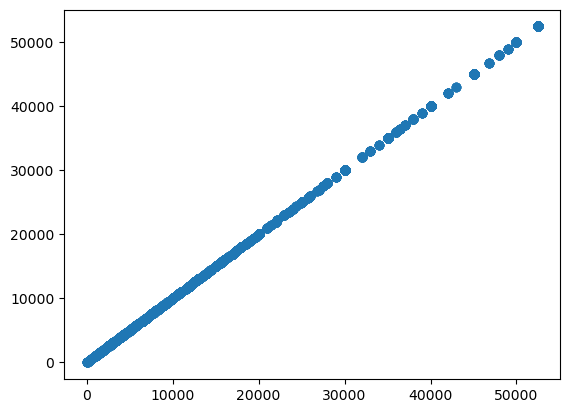

In [857]:
plt.scatter(y,y)

In [858]:
# imports for modelling
from sklearn.model_selection import train_test_split #for splitting

# models
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor;
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge;
from xgboost import XGBRegressor;
from lightgbm import LGBMRegressor;
from sklearn.ensemble import RandomForestRegressor

#for measuring accuracy
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [859]:
def evaluate_model(model, X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size = .85);
    model.fit(X_train, y_train);
    
    y_pred = model.predict(X_test);
    print('r^2 Score: ', r2_score(y_test, y_pred)) # accuracy score
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred)); #closer to zero, better
    print('Root Mean Square Eror: ', np.sqrt(mean_squared_error(y_test, y_pred)))  #closer to zero, better
    
    # print(cross_val_score(model,X,y,cv = 10).mean())

    plt.scatter(y_train, model.predict(X_train), color='g')
    plt.plot(y_pred, y_pred)
    plt.show()

BayesianRidge()
r^2 Score:  0.4356789312145103
Mean Absolute Error:  8878.555810582096
Root Mean Square Eror:  12124.124245961322


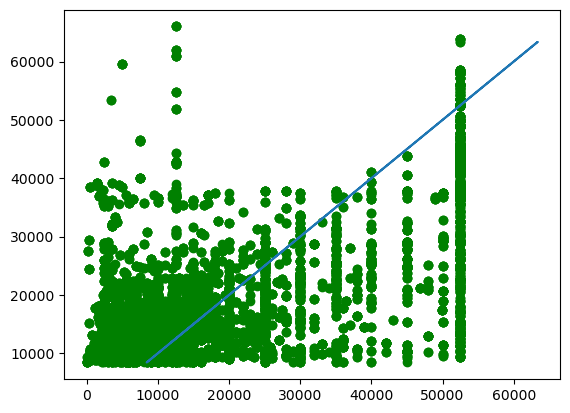

SGDRegressor()
r^2 Score:  -7876023926098396.0
Mean Absolute Error:  954322344182.025
Root Mean Square Eror:  1432322318808.4646


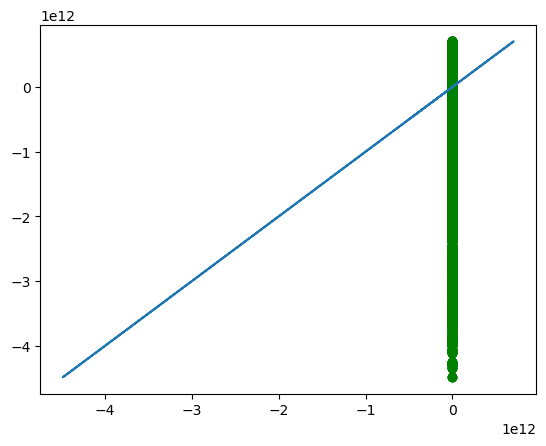

ElasticNet()
r^2 Score:  0.4357237273439428
Mean Absolute Error:  8878.745862074753
Root Mean Square Eror:  12123.643026450285


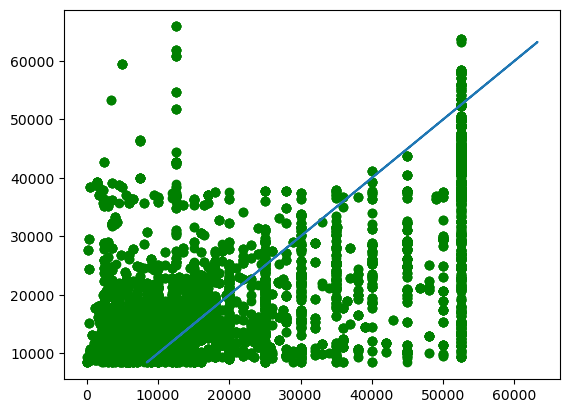

GradientBoostingRegressor()
r^2 Score:  0.6487905758155619
Mean Absolute Error:  6809.41875449781
Root Mean Square Eror:  9564.677395155823


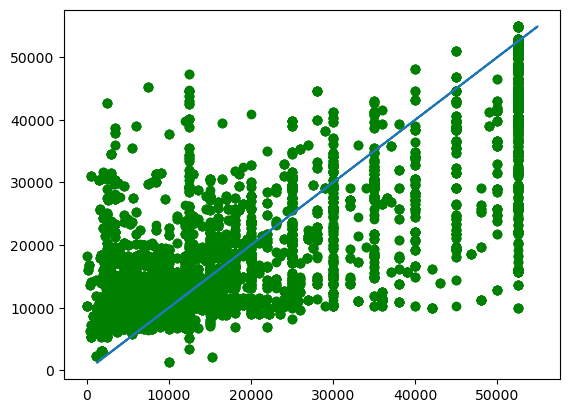

LinearRegression()
r^2 Score:  0.43562951992103194
Mean Absolute Error:  8878.412226253296
Root Mean Square Eror:  12124.655021420149


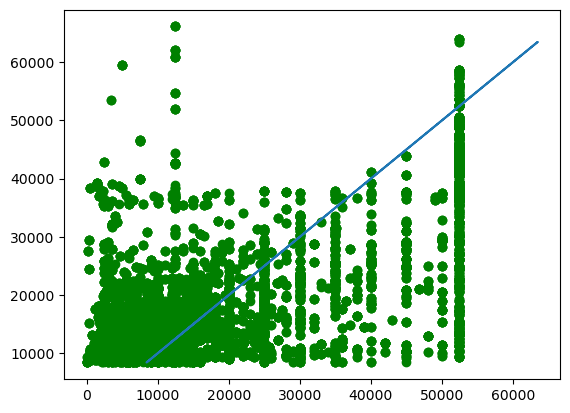

KernelRidge()
r^2 Score:  0.355311532568082
Mean Absolute Error:  9127.266753452335
Root Mean Square Eror:  12958.722697951898


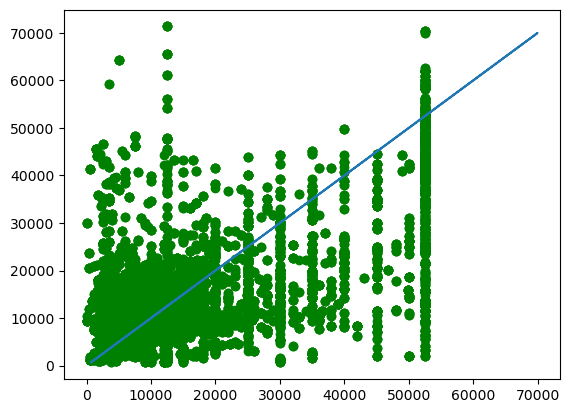

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
r^2 Score:  0.8603678865092799
Mean Absolute Error:  3953.9211491807896
Root Mean Square Eror:  6030.869092540599


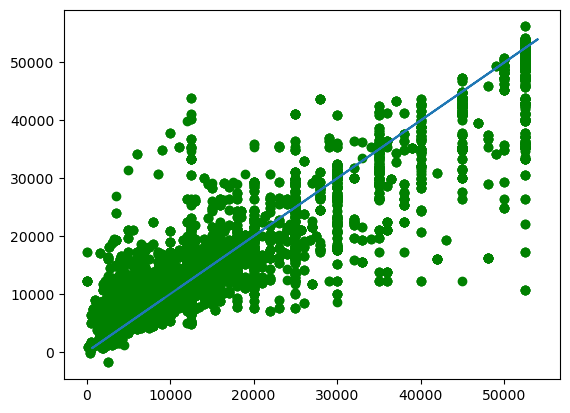

LGBMRegressor()
r^2 Score:  0.7679843540631275
Mean Absolute Error:  5464.401507254529
Root Mean Square Eror:  7774.024090302639


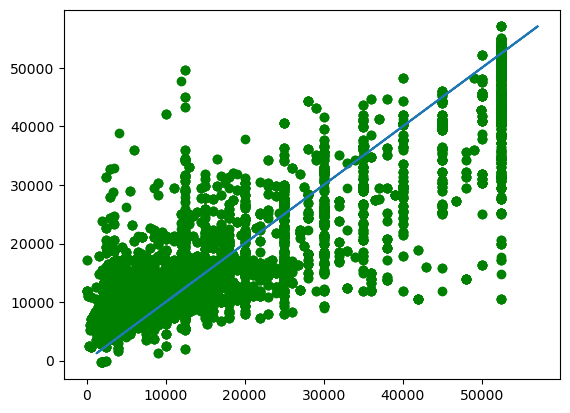

RandomForestRegressor()
r^2 Score:  0.8934584890932931
Mean Absolute Error:  2715.334317576073
Root Mean Square Eror:  5268.0109810304775


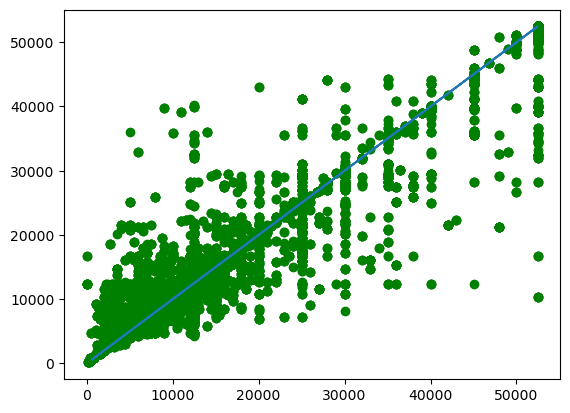

In [860]:
models = [BayesianRidge(),SGDRegressor(),ElasticNet(),GradientBoostingRegressor()
          ,LinearRegression(),KernelRidge(),XGBRegressor(),LGBMRegressor(), RandomForestRegressor()]
for model in models:
    print(model)
    evaluate_model(model, X,y) #fitting and evaluating model

### CHOSEN MODEL : <b>Random Forest Regressor</b>
Accuracy Score : 89.9 (90) % <br>
Cross Validation Score (10) :  91.206 %
 

### FEATURE ENGINEERING TECHNIQUES

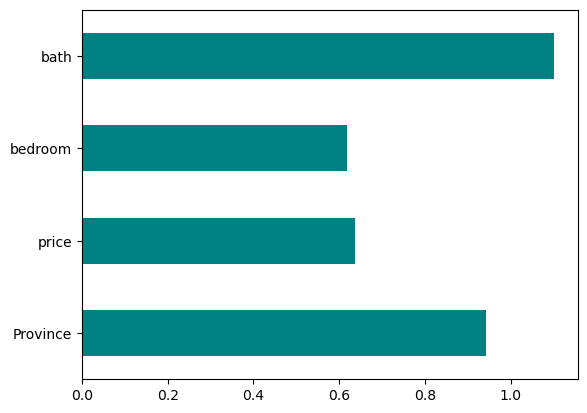

In [861]:
#information gain
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X,y);
feat_importances = pd.Series(importances, df.columns[0:len(df.columns)-1])
feat_importances.plot(kind='barh', color='teal')
plt.show()

r^2 Score:  0.8926604475198386
Mean Absolute Error:  2719.3938443379384
Root Mean Square Eror:  5287.7040024248045


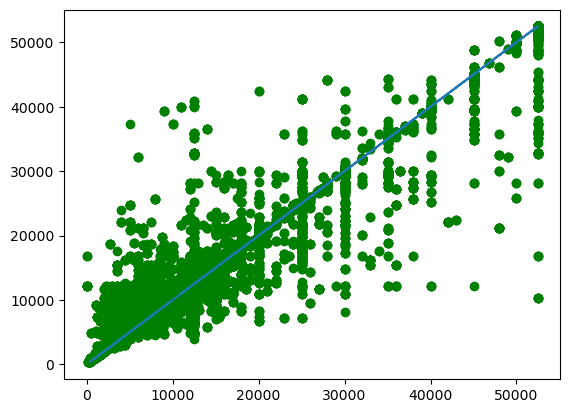

In [862]:
#Chi square test
from sklearn.feature_selection import SelectKBest;
from sklearn.feature_selection import chi2;

rf = RandomForestRegressor();
chi2_features = SelectKBest(chi2, k = 4); # k is the number of features you want to retain
X_chi2 = chi2_features.fit_transform(X,y);

evaluate_model(rf,X_chi2,y)

In [863]:
#Correlation
corr = df.corr()
corr['price'] = abs(corr['price'])
corr['price']

Province      0.077148
price         1.000000
bedroom       0.420274
bath          0.349894
floor_area    0.617503
Name: price, dtype: float64

Index(['Province', 'bedroom', 'bath', 'floor_area'], dtype='object')

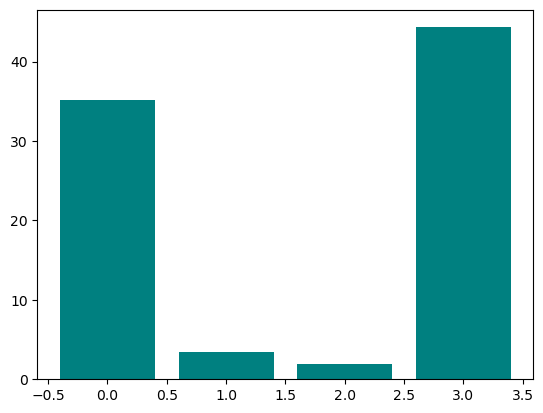

In [864]:
#calculate MAD
mean_abs_diff = np.sum(np.abs(X - np.mean(X,axis = 0)),axis = 0)/X.shape[0];
plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')
X.columns


r^2 Score:  0.8932465735517809
Mean Absolute Error:  2713.6293574027777
Root Mean Square Eror:  5273.247525984849


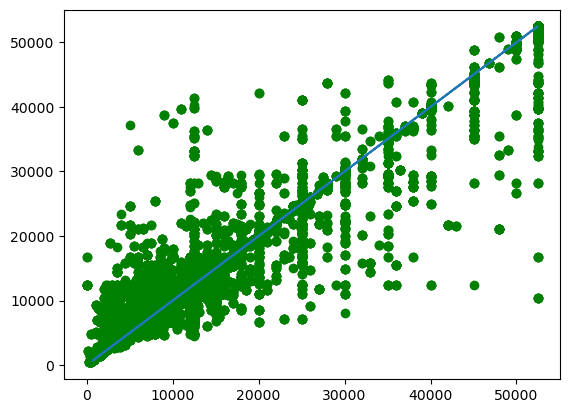

In [865]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(data = X_pca,columns = ['PCA1','PCA2','PCA3'])
evaluate_model(rf,pca_df,y)

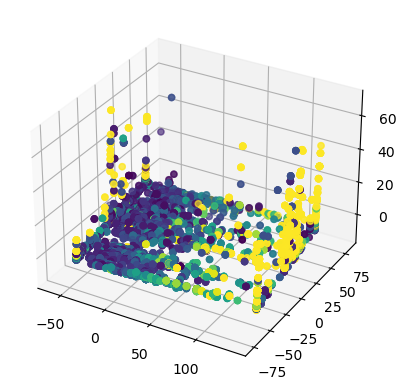

In [866]:
fig = plt.figure();
ax = fig.add_subplot(projection = '3d');
ax.scatter(pca_df ['PCA1'],pca_df ['PCA2'],pca_df ['PCA3'],
          c = y, marker = 'o')

r^2 Score:  0.8938089266368971
Mean Absolute Error:  2708.0517054854695
Root Mean Square Eror:  5259.34004434854


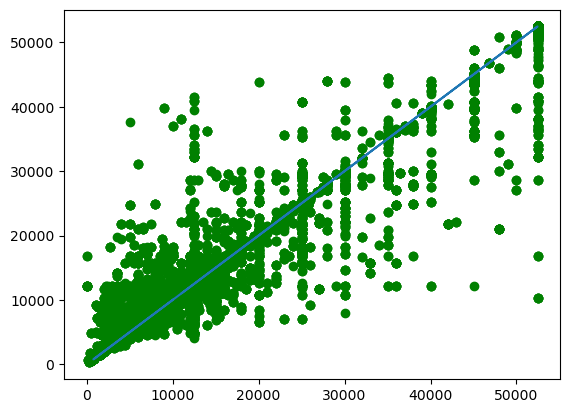

In [867]:
from sklearn.decomposition import FastICA 

ica = FastICA(n_components = 3)
X_ica = ica.fit_transform(X)
evaluate_model(rf,X_ica,y)

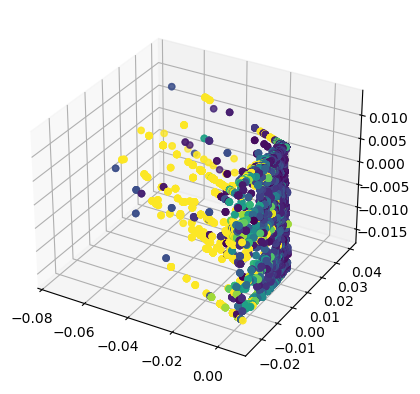

In [868]:
ica_df = pd.DataFrame(data = X_ica,columns = ['ICA1','ICA2','ICA3'])
fig = plt.figure();
ax = fig.add_subplot(projection = '3d');
ax.scatter(ica_df ['ICA1'],ica_df ['ICA2'],ica_df ['ICA3'],
          c = y, marker = 'o')

r^2 Score:  0.8922016998027545
Mean Absolute Error:  2721.8666508334118
Root Mean Square Eror:  5298.991248574334


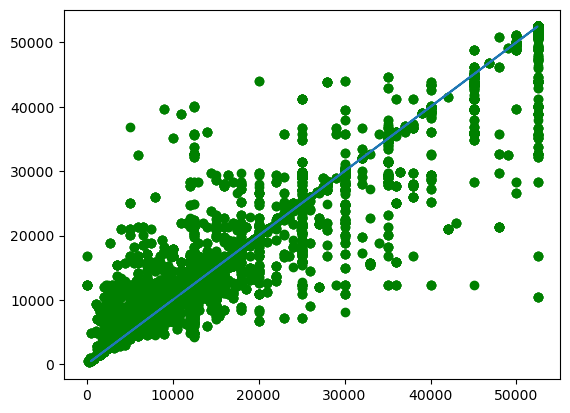

In [869]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis;

lda = LinearDiscriminantAnalysis(n_components = 4)
X_lda = lda.fit(X,y).transform(X)
evaluate_model(rf,X_lda,y)


### FINAL MODEL

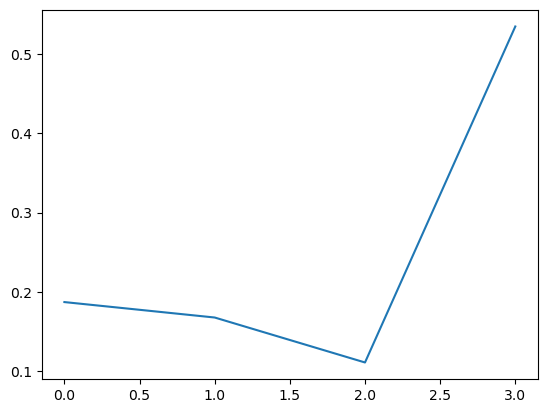

In [870]:
rf.fit(X, y)
plt.plot(rf.feature_importances_)

In [871]:
#sample prediction
print(rf.predict(np.array([10,1,1,100]).reshape((1, -1)))[0])


13787.5


In [872]:
df_copy

,Province,price,bedroom,bath,floor_area
0,Santo Tomas,12500.0,1,1,15.0
1,Makati,52450.0,35,35,178.5
2,Pasig,8500.0,1,1,20.0
3,Caloocan,12000.0,1,1,26.0
4,Bacoor,12500.0,40,40,178.5
...,...,...,...,...,...
13849,Cebu,25000.0,3,2,100.0
13850,Mandaue,10500.0,1,1,0.0
13851,Las Piñas,4500.0,1,0,18.0
13852,Angeles,45000.0,3,3,120.0


### PICKLING

In [873]:
## pickling the column with label encoded value
import pickle;

# df_new[col] = encoder.fit_transform(df_new[col])
# with open('..\python-API\province_encoded.pkl', 'wb') as f:
#     pickle.dump(X['Province'], f)

# df_copy['Province'] = encoder.fit_transform(df_copy['Province']);



# encoder2 = LabelEncoder();
# df_copy['Province'] = encoder2.fit(df_copy['Province'])
# filehandler = open("..\python-API\province_encoded.pkl","wb");
# pickle.dump(encoder2,filehandler);
# filehandler.close()

Encoder2 = LabelEncoder()
Encoder2.fit(df_copy['Province'])

with open("..\python-API\Encoded_Province.pkl", 'wb') as file:
    pickle.dump(Encoder2,file)



FileNotFoundError: [Errno 2] No such file or directory: '..\\python-API\\Encoded_Province.pkl'

In [ ]:
df_copy


In [ ]:
#pickling model
# dbfile = open ('..\python-API\\price_prediction.sav','wb'); # create file
# pickle.dump(y,dbfile); # dump to pickle

rf.fit(X, y); #load set
dbfile = open ('..\python-API\\price_prediction.sav','wb'); # create file
pickle.dump(rf,dbfile); # dump to pickle

In [ ]:
df_copy.dtypes